In [638]:
# !pip install yfinance --upgrade --no-cache-dir

In [639]:
# Importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
import yfinance as yf
import datetime as dt


In [640]:
# Setting the timeline
years= 5
end_date= dt.datetime.today()
start_date= end_date - dt.timedelta(years * 365)


In [641]:
# Downloading stock data
tickers= ["JPM", "GS", "BAC", "MS"]

close_df= pd.DataFrame()

for ticker in tickers:
    data= yf.download(ticker, start= start_date, end= end_date)
    close_df[ticker]= data["Close"]

close_df= close_df.dropna()
# print(close_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


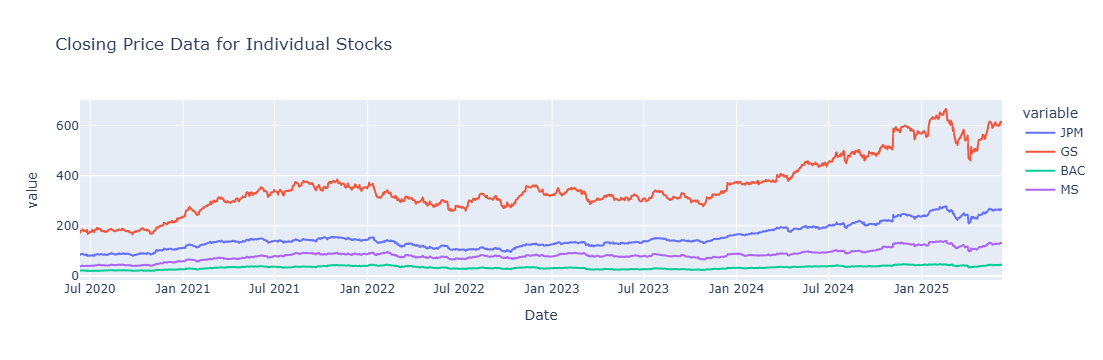

In [642]:
# Visualising individual stock values over time
fig1= px.line(close_df, title= "Closing Price Data for Individual Stocks")
fig1.show()


In [643]:
# Calculating log returns
log_returns= np.log(close_df/close_df.shift(1))
log_returns= log_returns.dropna()
# print(log_returns.head())


In [644]:
# Creating an equally weighted portfolio
weights= np.array([1/len(tickers)]*len(tickers))
portfolio_returns= log_returns.dot(weights)
# print(portfolio_returns.head())


In [645]:
# Calculating annualised returns of the portfolio
annualised_portfolio_returns= portfolio_returns.mean()*252
print(f"Annualised portfolio returns= {round((annualised_portfolio_returns * 100), 2)}%")


Annualised portfolio returns= 22.2%


In [646]:
# Calculating annualised volatility of the portfolio
daily_portfolio_volatility= np.std(portfolio_returns)
annualised_portfolio_volatility= daily_portfolio_volatility * np.sqrt(252)
print(f"Annualised portfolio volatility= {round((annualised_portfolio_volatility * 100), 2)}%")


Annualised portfolio volatility= 25.9%


In [647]:
# Calculating market returns
mkt_data= pd.DataFrame()
mkt_data= yf.download("SPY", start= start_date, end= end_date)["Close"]

mkt_returns= np.log(mkt_data/mkt_data.shift(1))
mkt_returns= mkt_returns.dropna()
print(mkt_returns.head())
print(type(mkt_returns))


[*********************100%***********************]  1 of 1 completed

Ticker           SPY
Date                
2020-06-12  0.011905
2020-06-15  0.009292
2020-06-16  0.019065
2020-06-17 -0.004162
2020-06-18  0.000385
<class 'pandas.core.frame.DataFrame'>


In [648]:
# Visualising portfolio value vs market value
portfolio_value= []
portfolio_value.append(1000000)

for i in portfolio_returns:
    portfolio_value.append(portfolio_value[-1]*np.exp(i))

market_value= []
market_value.append(1000000)

for i in mkt_returns["SPY"]:
    market_value.append(market_value[-1]*np.exp(i))

data1= [portfolio_value, market_value]

data1 = pd.DataFrame({
    "Date": mkt_returns.index.insert(0, mkt_returns.index[0]),
    "Market value": market_value,
    "Portfolio value": portfolio_value
})

print(data1)

fig2= px.line(data1, x= "Date",  y=["Market value", "Portfolio value"], title= "Portfolio Value vs Market Value")
fig2.show()


           Date  Market value  Portfolio value
0    2020-06-12  1.000000e+06     1.000000e+06
1    2020-06-12  1.011976e+06     1.035154e+06
2    2020-06-15  1.021423e+06     1.054656e+06
3    2020-06-16  1.041083e+06     1.074197e+06
4    2020-06-17  1.036759e+06     1.050279e+06
...         ...           ...              ...
1250 2025-06-03  2.132695e+06     2.976995e+06
1251 2025-06-04  2.132122e+06     2.957726e+06
1252 2025-06-05  2.121818e+06     2.973968e+06
1253 2025-06-06  2.143607e+06     3.015797e+06
1254 2025-06-09  2.147686e+06     3.018236e+06

[1255 rows x 3 columns]


In [649]:
# Calculating annualised market returns
annualised_market_returns= mkt_returns["SPY"].mean()*252
print(f"Annualised market returns= {round((annualised_market_returns * 100), 2)}%")


Annualised market returns= 15.36%


In [650]:
# Calculating annualised market volatility
daily_mkt_volatility= np.std(mkt_returns["SPY"], axis=0)
annualised_market_volatility= daily_mkt_volatility * np.sqrt(252)
print(f"Annualised market volatility= {round((annualised_market_volatility * 100), 2)}%")


Annualised market volatility= 17.64%


In [651]:
# Calculating beta of the portfolio
# print(np.cov(portfolio_returns, mkt_returns["SPY"]))
beta= (np.cov(portfolio_returns, mkt_returns["SPY"])[1][0])/(np.cov(portfolio_returns, mkt_returns["SPY"])[1][1])
print(f"Beta of the portfolio= {round(beta,2)}")


Beta of the portfolio= 1.02


In [652]:
# Calculating alpha of the portfolio
Rf= 0.05

capm_returns= annualised_market_returns + beta * (annualised_market_returns - Rf)
print(f"CAPM portfolio returns= {round((capm_returns * 100), 2)}%")

alpha= annualised_portfolio_returns - capm_returns
print(f"Alpha of the portfolio= {round((alpha * 100), 2)}%")


CAPM portfolio returns= 25.95%
Alpha of the portfolio= -3.75%


In [653]:
# Calculating Sharpe ratio
sharpe_ratio= (annualised_portfolio_returns - Rf)/annualised_portfolio_volatility
print(f"Sharpe ratio of the portfolio= {round(sharpe_ratio,2)}")


Sharpe ratio of the portfolio= 0.66


In [654]:
# Calculating Treynor ratio
treynor_ratio= (annualised_portfolio_returns - Rf)/beta
print(f"Treynor ratio of the portfolio= {round(treynor_ratio,2)}")


Treynor ratio of the portfolio= 0.17


In [655]:
# Calculating Sortino ratio

downside_returns= []
for i in portfolio_returns:
    if i<0:
        downside_returns.append(i)

downside_returns= np.array(downside_returns)
downside_dev= np.std(downside_returns)
print(f"Portfolio's downside volatility= {round((downside_dev * 100), 2)}%")

sortino_ratio= (annualised_portfolio_returns - Rf)/downside_dev
print(f"Sortino ratio of the portfolio= {round(sortino_ratio,2)}")


Portfolio's downside volatility= 1.09%
Sortino ratio of the portfolio= 15.71


In [656]:
# Calculating Calmer ratio
max_portfolio_value_position= portfolio_value.index(np.max(portfolio_value))

min_portfolio_value_post_max= portfolio_value[max_portfolio_value_position]

i= max_portfolio_value_position
while i < len(portfolio_value):
    if portfolio_value[i] < min_portfolio_value_post_max:
        min_portfolio_value_post_max = portfolio_value[i]
    i+=1

# print(np.max(portfolio_value))
# print(min_portfolio_value_post_max)

max_drawdown= (np.max(portfolio_value) - min_portfolio_value_post_max)/np.max(portfolio_value)
print(f"Portfolio's maximum drawdown= {round((max_drawdown * 100), 2)}%")

calmer_ratio= annualised_portfolio_returns / max_drawdown
print(f"Calmer ratio of the portfolio= {round(calmer_ratio,2)}")


Portfolio's maximum drawdown= 27.21%
Calmer ratio of the portfolio= 0.82
